### Node2Vec model using torch geometric with Cora

In [1]:
# imports
import torch
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import Node2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 

In [2]:
# Import the data
dataset = Planetoid(root=".", name="Cora")
data = dataset[0]
print("Coda", data)

Coda Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [3]:
model = Node2Vec(data.edge_index, embedding_dim=128, walk_length=20,
                     context_size=10, walks_per_node=10,
                     num_negative_samples=1, p=1, q=1, sparse=True)

loader = model.loader(batch_size=128, shuffle=True)
optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)

def train():
    model.train()
    total_loss = 0
    for pos_rw, neg_rw in loader:
        optimizer.zero_grad()
        loss = model.loss(pos_rw, neg_rw)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

@torch.no_grad()
def test():
    model.eval()
    z = model()
    acc = model.test(
        z[data.train_mask], data.y[data.train_mask], z[data.test_mask], 
        data.y[data.test_mask], max_iter=150)
    return acc

for epoch in range(1, 101):
    loss = train()
    acc = test()
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Acc: {acc:.4f}')

Epoch: 01, Loss: 8.1203, Acc: 0.1310
Epoch: 02, Loss: 6.0721, Acc: 0.1450
Epoch: 03, Loss: 4.9545, Acc: 0.1740
Epoch: 04, Loss: 4.1337, Acc: 0.2010
Epoch: 05, Loss: 3.4823, Acc: 0.2380
Epoch: 06, Loss: 2.9575, Acc: 0.2820
Epoch: 07, Loss: 2.5538, Acc: 0.3270
Epoch: 08, Loss: 2.2181, Acc: 0.3590
Epoch: 09, Loss: 1.9541, Acc: 0.3920
Epoch: 10, Loss: 1.7440, Acc: 0.4140
Epoch: 11, Loss: 1.5738, Acc: 0.4490
Epoch: 12, Loss: 1.4324, Acc: 0.4800
Epoch: 13, Loss: 1.3235, Acc: 0.4950
Epoch: 14, Loss: 1.2353, Acc: 0.5270
Epoch: 15, Loss: 1.1622, Acc: 0.5480
Epoch: 16, Loss: 1.1049, Acc: 0.5720
Epoch: 17, Loss: 1.0606, Acc: 0.5860
Epoch: 18, Loss: 1.0258, Acc: 0.6020
Epoch: 19, Loss: 0.9974, Acc: 0.6170
Epoch: 20, Loss: 0.9718, Acc: 0.6370
Epoch: 21, Loss: 0.9527, Acc: 0.6430
Epoch: 22, Loss: 0.9373, Acc: 0.6550
Epoch: 23, Loss: 0.9227, Acc: 0.6630
Epoch: 24, Loss: 0.9120, Acc: 0.6710
Epoch: 25, Loss: 0.9039, Acc: 0.6700
Epoch: 26, Loss: 0.8943, Acc: 0.6750
Epoch: 27, Loss: 0.8880, Acc: 0.6790
E

c:\Users\Lenovo\anaconda3\envs\myenv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Lenovo\anaconda3\envs\myenv\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


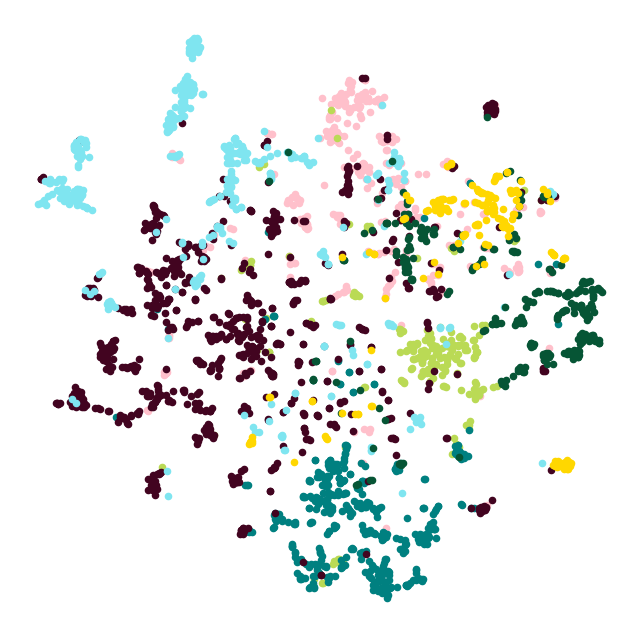

In [4]:
@torch.no_grad()
def plot_points(colors):
    model.eval()
    z = model(torch.arange(data.num_nodes))
    z = TSNE(n_components=2).fit_transform(z.cpu().numpy())
    y = data.y.cpu().numpy()

    plt.figure(figsize=(8, 8))
    for i in range(dataset.num_classes):
        plt.scatter(z[y == i, 0], z[y == i, 1], s=20, color=colors[i])
    plt.axis('off')
    plt.show()

colors = [
    '#ffc0cb', '#bada55', '#008080', '#420420', '#7fe5f0', '#065535',
    '#ffd700'
    ]
plot_points(colors)
